# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [74]:
import pandas as pd
# I'm using two datasets: one on conflict events in Mexico from the ACLED (Armed Conflict Location and Event Data)
# and data on forest loss in Mexico from Global Forest Watch.

# Load the conflict dataset into a df
conflict_df = pd.read_csv('/Users/audreythill/Desktop/LaunchCode/Python/Final Project/ACLED_Mexico Conflict Data.csv')

# Load 2 different csv files related to forest loss in Mexico (by region and by cause)
cause_df = pd.read_csv('/Users/audreythill/Desktop/LaunchCode/Python/Final Project/GFW_Mexico_treecover_loss__ha.csv')
admin_df = pd.read_csv('/Users/audreythill/Desktop/LaunchCode/Python/Final Project/GFW_Mexico_loss by region.csv')

# I need to join the two forest dataframes using an 'outer' merge (on year) column but to retain the data that is not the same 
# (e.g both have forest loss columns but the unit of analysis is different (admin vs cause))
merged_forest_df = pd.merge(cause_df, admin_df, on='umd_tree_cover_loss__year', how='outer', suffixes=('_cause', '_admin'))

# Rename the 'umd_tree_cover_loss__year' to 'year' and 'adm' to 'admin1' to match the corresponding columns in conflict_df.
merged_forest_renamed_year = merged_forest_df.rename(columns={'umd_tree_cover_loss__year': 'year'})
merged_forest_renamed_location = merged_forest_renamed_year.rename(columns={'adm1': 'admin1'})

# Merge the conflict and forest dataframes on 'year' with an outer join to retain all columns.
merged_df = pd.merge(merged_forest_renamed_location, conflict_df, on=['year','admin1'], how='outer')
merged_df.head()



,tsc_tree_cover_loss_drivers__driver,year,umd_tree_cover_loss__ha_cause,gfw_gross_emissions_co2e_all_gases__Mg_cause,iso_x,admin1,umd_tree_cover_loss__ha_admin,gfw_gross_emissions_co2e_all_gases__Mg_admin,event_id_cnty,event_date,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,Commodity driven deforestation,2001,30009.328237,8.492504e+06,MEX,Aguascalientes,3.792795,308.002330,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Urbanization,2001,865.735246,1.912652e+05,MEX,Aguascalientes,3.792795,308.002330,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unknown,2001,2526.940860,4.566551e+05,MEX,Aguascalientes,3.792795,308.002330,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Commodity driven deforestation,2001,30009.328237,8.492504e+06,MEX,Baja California,49.891421,3008.830676,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Urbanization,2001,865.735246,1.912652e+05,MEX,Baja California,49.891421,3008.830676,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [75]:
# Find the shape. The df has 260952 rows and 38 columns
merged_df.shape

# Find the descriptive statistics. This isn't super helpful as a lot of the columns are strings
merged_df.describe()

# Check the datatypes: 
print(merged_df.dtypes)

# Identify how many nulls there are in the df:
merged_df.isnull().sum()
# There are no nulls in the forest data. The conflict dataset does have nulls, but these are
# likely not from an error but simply that the category of data was not relevant to the event type.

# How many administrative areas (admin1) are in the dataset?
print(len(merged_df['admin1'].unique()))
# This results in 41 unique admins, which indicates something is wrong since Mexico has 31 states. 
# likely there are different spellings.


tsc_tree_cover_loss_drivers__driver              object
year                                              int64
umd_tree_cover_loss__ha_cause                   float64
gfw_gross_emissions_co2e_all_gases__Mg_cause    float64
iso_x                                            object
admin1                                           object
umd_tree_cover_loss__ha_admin                   float64
gfw_gross_emissions_co2e_all_gases__Mg_admin    float64
event_id_cnty                                    object
event_date                                       object
time_precision                                  float64
disorder_type                                    object
event_type                                       object
sub_event_type                                   object
actor1                                           object
assoc_actor_1                                    object
inter1                                           object
actor2                                          

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

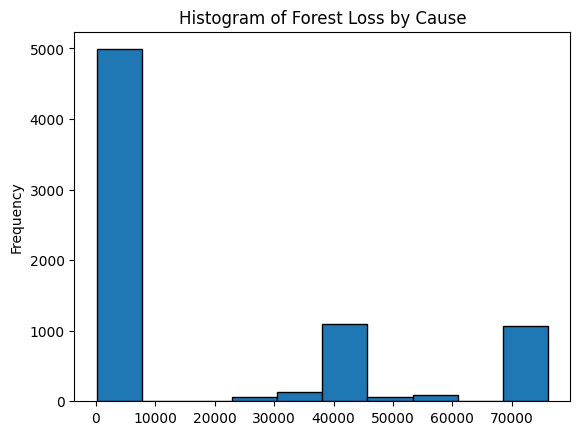

In [77]:
# Created a histogram of forest loss by cause. This produced a weirdly distributed chart because it's 
# showing frequency of the values. Which is not helpful.
import matplotlib.pyplot as plt 
merged_df['umd_tree_cover_loss__ha_cause'].plot.hist(bins=10, edgecolor='black')
plt.title('Histogram of Forest Loss by Cause')
plt.show()

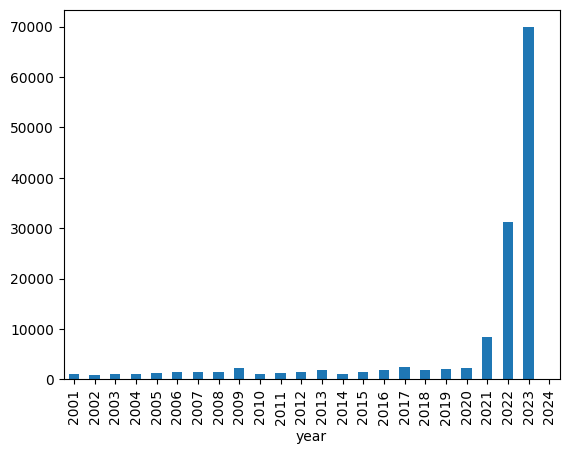

In [82]:
import matplotlib.pyplot as plt 
# Visualize some of the forest loss data:

# Convert hectares to thousands of hectares. 
merged_df['forest_loss_thousands'] = merged_df['umd_tree_cover_loss__ha_cause'] / 1000

# Group the data by year
cause_by_year = merged_df.groupby('year')['forest_loss_thousands'].sum()

cause_by_year.plot.bar(x="year",y="umd_tree_cover_loss__ha_cause")
plt.show()

# this is a surprising jump in 2023. Makes me think it is an outlier - I will need to look at it.


In [ ]:
# Visualize the conflict data:

# Count the individual events by the event id.
conflict_events = merged_df['event_id_cnty'].count()
# Group the data by year
grouped_data2 = conflict.groupby('year')['forest_loss_thousands'].sum()

cause_by_year.plot.bar(x="year",y="umd_tree_cover_loss__ha_cause")
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 